In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [284]:
df_primos_10e3 = pd.read_excel('./primos_results_10e3.xlsx')
df_primos_10e6 = pd.read_excel('./primos_results_10e6.xlsx')

#### Calculando o tempo média de execução

In [285]:
# Média de n = 1000 ou n = 1000000
def calcula_media(n):
    lista_media_total = []
    if n == 1000:
        total = df_primos_10e3['Total']
    elif n == 1000000:
        total = df_primos_10e6['Total']
    media_acumulada = 0
    for i in range(len(total)):
        media_acumulada += total[i]
        if (i + 1) % 10 == 0:
            media_acumulada += total[i]
            lista_media_total.append(media_acumulada)
            media_acumulada = 0
    return lista_media_total

# primeiro elemento da lista é t=1, segundo é t=2 e terceiro é t=4

#### Cálculo de Aceleração(A) e Eficiência(E)

Fórmulas:

    - A(n, t) = Ts(n)/Tp(n, t)
    - E(n, t) = A(n, t)/t

In [286]:
def Ts(n):
    return calcula_media(n)[0]

def Tp(n,t):
    if t == 1:
        return calcula_media(n)[0]
    if t == 2:
        return calcula_media(n)[1]
    elif t == 4:
        return calcula_media(n)[2]

# Aceleração
def Aceleracao(n,t):
    res = Ts(n) / Tp(n,t)
    return res

# Eficiência
def Eficiencia(n,t):
    res = Aceleracao(n,t) / t
    return res

#### Sequencial

In [287]:
# Sequencial
n = 1000
print(f"Valor de Ts(n) para n = {n}:", Ts(n))
print(f"Valor da Aceleração:", Aceleracao(n,t=1))
print(f"Valor de Eficiência:", Eficiencia(n, t=1))
Ace_Seq_n_10e3 = Aceleracao(n,t=1)
Efi_Seq_n_10e3 = Eficiencia(n,t=1)

n = 1000000
print(f"Valor de Ts(n) para n = {n}:", Ts(n))
print(f"Valor da Aceleração:", Aceleracao(n,t=1))
print(f"Valor de Eficiência:", Eficiencia(n, t=1))
Ace_Seq_n_10e6 = Aceleracao(n,t=1)
Efi_Seq_n_10e6 = Eficiencia(n,t=1)

Valor de Ts(n) para n = 1000: 0.0020870000000000003
Valor da Aceleração: 1.0
Valor de Eficiência: 1.0
Valor de Ts(n) para n = 1000000: 3.3058069999999997
Valor da Aceleração: 1.0
Valor de Eficiência: 1.0


#### Concorrente

In [288]:
# Concorrente
n = 1000
t = 2
print(f"Valor de Tp(n) para n = {n} e t = {t}:", Tp(n,t))
print(f"Valor da Aceleração:", Aceleracao(n,t))
print(f"Valor de Eficiência:", Eficiencia(n, t))
Ace_Con_n_10e3_t2 = Aceleracao(n,t)
Efi_Con_n_10e3_t2 = Eficiencia(n,t)

n = 1000000
print(f"Valor de Tp(n) para n = {n} e t = {t}:", Tp(n,t))
print(f"Valor da Aceleração:", Aceleracao(n,t))
print(f"Valor de Eficiência:", Eficiencia(n, t))
Ace_Con_n_10e6_t2 = Aceleracao(n,t)
Efi_Con_n_10e6_t2 = Eficiencia(n,t)

n = 1000
t = 4
print(f"Valor de Tp(n) para n = {n} e t = {t}:", Tp(n,t))
print(f"Valor da Aceleração:", Aceleracao(n,t))
print(f"Valor de Eficiência:", Eficiencia(n, t))
Ace_Con_n_10e3_t4 = Aceleracao(n,t)
Efi_Con_n_10e3_t4 = Eficiencia(n,t)

n = 1000000
print(f"Valor de Tp(n) para n = {n} e t = {t}:", Tp(n,t))
print(f"Valor da Aceleração:", Aceleracao(n,t))
print(f"Valor de Eficiência:", Eficiencia(n, t))
Ace_Con_n_10e6_t4 = Aceleracao(n,t)
Efi_Con_n_10e6_t4 = Eficiencia(n,t)

Valor de Tp(n) para n = 1000 e t = 2: 0.0024240000000000004
Valor da Aceleração: 0.860973597359736
Valor de Eficiência: 0.430486798679868
Valor de Tp(n) para n = 1000000 e t = 2: 1.7751639999999997
Valor da Aceleração: 1.8622544170566777
Valor de Eficiência: 0.9311272085283389
Valor de Tp(n) para n = 1000 e t = 4: 0.002468
Valor da Aceleração: 0.8456239870340357
Valor de Eficiência: 0.21140599675850894
Valor de Tp(n) para n = 1000000 e t = 4: 1.1968860000000001
Valor da Aceleração: 2.762006573725484
Valor de Eficiência: 0.690501643431371


#### Gerando gráficos de Aceleração, Eficiência e Execução

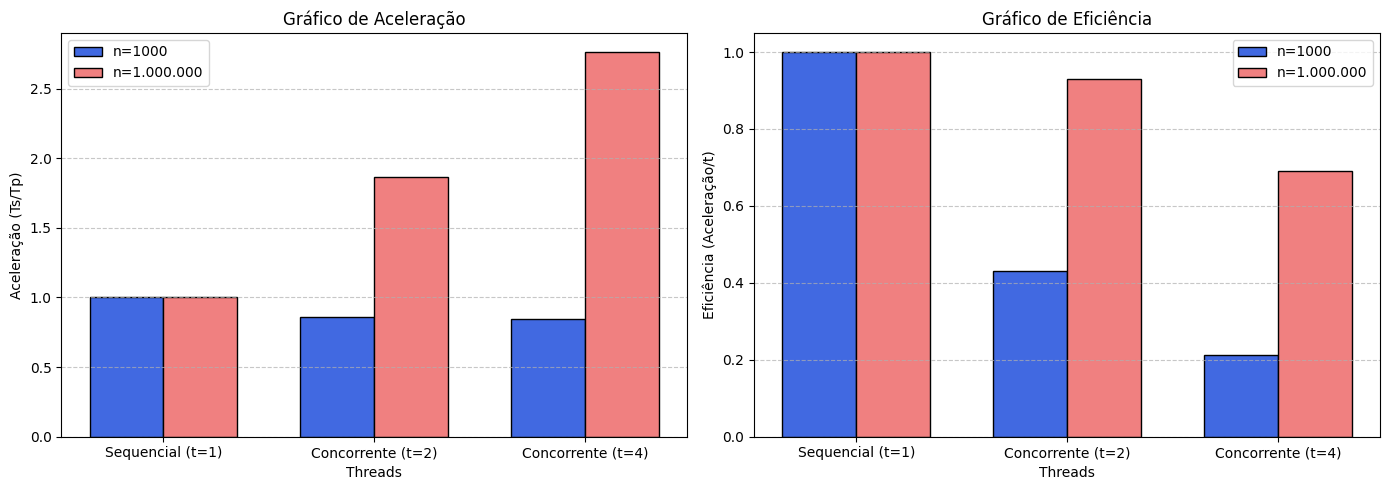

In [289]:
n_labels = ["n=1K", "n=1M"]
threads = [1, 2, 4]

# Dados de Aceleração (Ts/Tp)
aceleracao_data = {
    "n=1K": [Ace_Seq_n_10e3, Ace_Con_n_10e3_t2, Ace_Con_n_10e3_t4],
    "n=1M": [Ace_Seq_n_10e6, Ace_Con_n_10e6_t2, Ace_Con_n_10e6_t4]
}

# Dados de Eficiência (Aceleração/t)
eficiencia_data = {
    "n=1K": [Efi_Seq_n_10e3, Efi_Con_n_10e3_t2, Efi_Con_n_10e3_t4],
    "n=1M": [Efi_Seq_n_10e6, Efi_Con_n_10e6_t2, Efi_Con_n_10e6_t4]
}

# Criando os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de Aceleração
x = np.arange(len(threads))
width = 0.35
ax1.bar(x - width/2, aceleracao_data["n=1K"], width, label="n=1000", color="royalblue", edgecolor="black")
ax1.bar(x + width/2, aceleracao_data["n=1M"], width, label="n=1.000.000", color="lightcoral", edgecolor="black")
ax1.set_xticks(x)
ax1.set_xticklabels(["Sequencial (t=1)", "Concorrente (t=2)", "Concorrente (t=4)"])
ax1.set_xlabel("Threads")
ax1.set_ylabel("Aceleração (Ts/Tp)")
ax1.set_title("Gráfico de Aceleração")
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico de Eficiência
ax2.bar(x - width/2, eficiencia_data["n=1K"], width, label="n=1000", color="royalblue", edgecolor="black")
ax2.bar(x + width/2, eficiencia_data["n=1M"], width, label="n=1.000.000", color="lightcoral", edgecolor="black")
ax2.set_xticks(x)
ax2.set_xticklabels(["Sequencial (t=1)", "Concorrente (t=2)", "Concorrente (t=4)"])
ax2.set_xlabel("Threads")
ax2.set_ylabel("Eficiência (Aceleração/t)")
ax2.set_title("Gráfico de Eficiência")
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig('aceleracao_eficiencia.png')
plt.show()

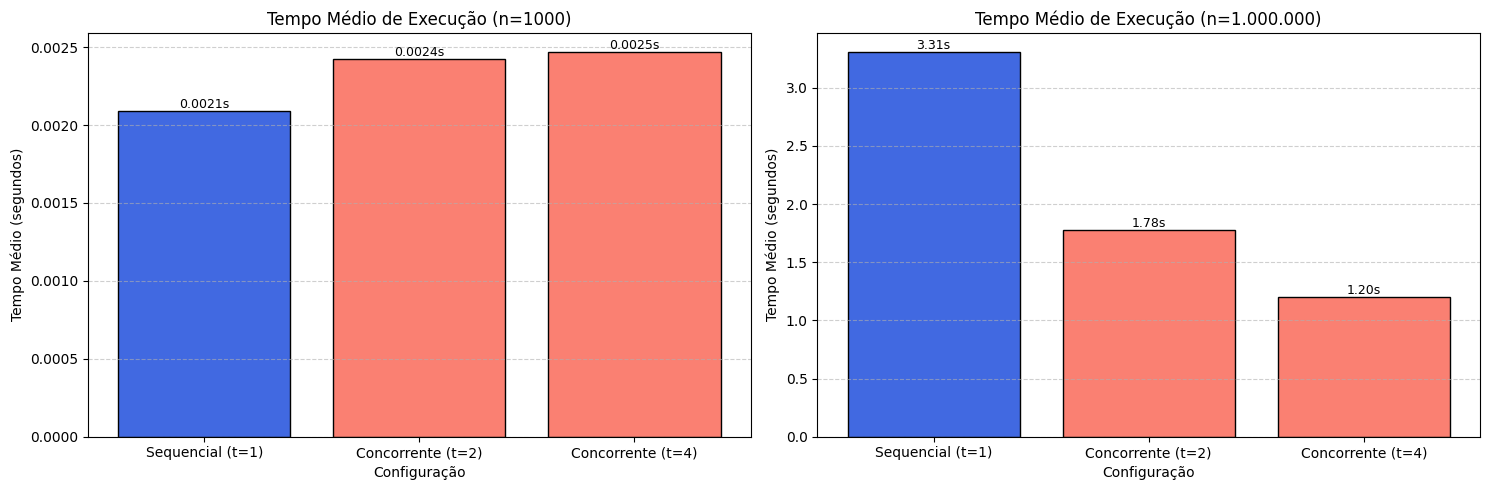

In [290]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de tempo médio
tempo_medio_data = {
    "n=1K": [Ts(1000), Tp(1000, 2), Tp(1000, 4)],
    "n=1M": [Ts(1000000), Tp(1000000, 2), Tp(1000000, 4)]
}

configs = ["Sequencial (t=1)", "Concorrente (t=2)", "Concorrente (t=4)"]
colors = ['royalblue', 'salmon', 'salmon']

# Criando os gráficos para ficarem lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico n=1000
bars1 = ax1.bar(configs, tempo_medio_data["n=1K"], color=colors, edgecolor='black')
ax1.set_xlabel("Configuração")
ax1.set_ylabel("Tempo Médio (segundos)")
ax1.set_title("Tempo Médio de Execução (n=1000)")
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando valores nas barras (n=1000)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}s', 
             ha='center', va='bottom', fontsize=9)

# Gráfico n=1000000
bars2 = ax2.bar(configs, tempo_medio_data["n=1M"], color=colors, edgecolor='black')
ax2.set_xlabel("Configuração")
ax2.set_ylabel("Tempo Médio (segundos)")
ax2.set_title("Tempo Médio de Execução (n=1.000.000)")
ax2.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando valores nas barras (n=1M)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}s', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('tempo_medio.png')
plt.show()

Após fazer as análises pelos prints e gráficos, pude observar alguns pontos interessantes. A eficiência e aceleração para o sequencial sempre deu 1, independente do valor de n. Já para  a configuração concorrente, a aceleração vai diminuindo de valor para n=1000, e aumentando para n=1.000.000. 

Isso ocorre porque o programa concorrente com mais threads é capaz de otimizar o processo de encontrar os primos, por mais que percamos tempo utilizando o lock e unlock do mutex. Esse "tempo perdido" só é considerável quando observamos o programa concorrente sendo executado para n=1000. Por termos menos números a serem percorridos, o processo de lock e unlock acaba custando mais tempo do que apenas usar 1 thread (sequencial).

A respeito da eficiência, não sei explicar ainda

A respeito do tempo médio, podemos observar que utilizar concorrência para um n << não é uma boa ideia, uma vez que o tempo médio foi maior do que o sequêncial. Tal fato pode ser explicado pelo mesmo motivo da aceleração para n=1000, uma vez que o lock e unlock deve estar aumentando esse tempo médio que foi medido experimentalmente. Porém, para um   n >> (no caso n=1.000.000) obtivemos um ganho de aproximadamente 2.1 segundos quando comparando o programa de 4 threads com o sequêncial, o que é um tempo considerável.

Professora, coloquei um link do github novo e de lá vou adicionando os exercícios, n tinha pensado nisso antes.

https://github.com/roguzf2/Exercicios-Prog-Conc